In [646]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Cleaning BLS Data 

In [647]:
bls_1 = pd.read_csv('../data/BLS_data_2001_2019.csv')
bls_2 = pd.read_csv('../data/BLS_data_2020_2023.csv')
bls = pd.concat([bls_1,bls_2])
bls.head()

,Unnamed: 0,year,periodName,CPI,CPI_yoy,Unemployment,NF Employment,NF Employment_yoy,ULC,ULC_yoy,...,Food,Food_yoy,Gasoline,Gasoline_yoy,Imports,Imports_yoy,New & Used Vehicles,New & Used Vehicles_yoy,All Items Less Food & Shelter,All Items Less Food & Shelter_yoy
0,0,2019,December,256.974,2.285130,3.6,151792.0,1.327067,NaN,NaN,...,259.823,1.807531,2.587,7.166529,125.0,0.482315,99.473,-0.609494,234.703,1.553353
1,1,2019,November,257.208,2.051278,3.6,151666.0,1.366109,NaN,NaN,...,259.467,2.000165,2.620,-1.909397,124.7,-1.188590,99.034,-0.429314,234.370,1.621645
2,2,2019,October,257.346,1.764043,3.6,151458.0,1.292760,NaN,NaN,...,259.632,2.073456,2.673,-7.412539,124.5,-2.961808,99.071,0.248925,233.939,1.587171
3,3,2019,September,256.759,1.711305,3.5,151358.0,1.337029,NaN,NaN,...,258.943,1.788571,2.630,-8.458058,125.0,-2.114330,99.066,0.479750,233.387,1.511006
4,4,2019,August,256.558,1.749780,3.6,151155.0,1.260099,NaN,NaN,...,258.410,1.705389,2.655,-7.232704,124.9,-2.115987,99.263,0.391399,233.239,1.646910


In [648]:
bls.shape

(384, 30)

In [649]:
# remove quarterly data and leave only monthly 
months = ['December', 'November', 'October', 'September', 'August', 'July',
       'June', 'May', 'April', 'March', 'February', 'January']

bls = bls[bls['periodName'].isin(months)]
bls['month'] = bls['periodName']

bls

,Unnamed: 0,year,periodName,CPI,CPI_yoy,Unemployment,NF Employment,NF Employment_yoy,ULC,ULC_yoy,...,Food_yoy,Gasoline,Gasoline_yoy,Imports,Imports_yoy,New & Used Vehicles,New & Used Vehicles_yoy,All Items Less Food & Shelter,All Items Less Food & Shelter_yoy,month
0,0,2019,December,256.974,2.285130,3.6,151792.0,1.327067,NaN,NaN,...,1.807531,2.587,7.166529,125.0,0.482315,99.473,-0.609494,234.703,1.553353,December
1,1,2019,November,257.208,2.051278,3.6,151666.0,1.366109,NaN,NaN,...,2.000165,2.620,-1.909397,124.7,-1.188590,99.034,-0.429314,234.370,1.621645,November
2,2,2019,October,257.346,1.764043,3.6,151458.0,1.292760,NaN,NaN,...,2.073456,2.673,-7.412539,124.5,-2.961808,99.071,0.248925,233.939,1.587171,October
3,3,2019,September,256.759,1.711305,3.5,151358.0,1.337029,NaN,NaN,...,1.788571,2.630,-8.458058,125.0,-2.114330,99.066,0.479750,233.387,1.511006,September
4,4,2019,August,256.558,1.749780,3.6,151155.0,1.260099,NaN,NaN,...,1.705389,2.655,-7.232704,124.9,-2.115987,99.263,0.391399,233.239,1.646910,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,43,2020,May,256.394,0.117926,13.2,133040.0,-11.683484,NaN,NaN,...,4.001782,1.879,-35.229231,119.0,-6.299213,98.571,-0.709141,232.598,0.303587,May
44,44,2020,April,256.389,0.329097,14.8,130421.0,-13.400220,NaN,NaN,...,3.511338,1.876,-33.827160,118.2,-6.782334,98.616,-1.022733,233.268,0.611602,April
45,45,2020,March,258.115,1.539327,4.4,150898.0,0.401879,NaN,NaN,...,1.933852,2.267,-11.583463,121.3,-4.186414,99.448,-0.440493,235.211,1.480283,March
46,46,2020,February,258.678,2.334874,3.5,152309.0,1.493999,NaN,NaN,...,1.809332,2.465,4.759881,124.3,-1.270850,99.642,-0.421730,235.554,1.699350,February


In [650]:
# drop null columns and nominal inflaiton columns leaving yoy incflation, unemployment and hourly earnings

bls.drop(columns=['ULC', 'ULC_yoy', 'Unnamed: 0', 'periodName', 'NF Employment',
       'NF Employment_yoy', 'PPI', 'PPI_yoy', 'Shelter', 'Energy', 'Medical Care', 'Hourly earnings',
        'Food', 'Gasoline', 'Imports','New & Used Vehicles', 'All Items Less Food & Shelter',
        'CPI' ], inplace=True)
bls.head()

,year,CPI_yoy,Unemployment,Hourly earnings_yoy,Shelter_yoy,Energy_yoy,Medical Care_yoy,Food_yoy,Gasoline_yoy,Imports_yoy,New & Used Vehicles_yoy,All Items Less Food & Shelter_yoy,month
0,2019,2.285130,3.6,2.976407,3.226840,3.437022,4.619287,1.807531,7.166529,0.482315,-0.609494,1.553353,December
1,2019,2.051278,3.6,3.316327,3.315695,-0.590061,4.272018,2.000165,-1.909397,-1.188590,-0.429314,1.621645,November
2,2019,1.764043,3.6,3.142126,3.355015,-4.166427,4.292580,2.073456,-7.412539,-2.961808,0.248925,1.587171,October
3,2019,1.711305,3.5,3.111274,3.506051,-4.751840,3.418900,1.788571,-8.458058,-2.114330,0.479750,1.511006,September
4,2019,1.749780,3.6,3.419118,3.352060,-4.389285,3.384868,1.705389,-7.232704,-2.115987,0.391399,1.646910,August


In [651]:
# convert year column to string
bls['year'] = bls['year'].astype(str)

In [652]:
bls.isna().sum()

year                                  0
CPI_yoy                              12
Unemployment                          0
Hourly earnings_yoy                  86
Shelter_yoy                          12
Energy_yoy                           12
Medical Care_yoy                     12
Food_yoy                             12
Gasoline_yoy                         12
Imports_yoy                          12
New & Used Vehicles_yoy              12
All Items Less Food & Shelter_yoy    12
month                                 0
dtype: int64

In [653]:
# the year 2000 are nulls in almost all columns 
nan_year_bls = bls[bls['CPI_yoy'].isna()]
nan_year_bls

,year,CPI_yoy,Unemployment,Hourly earnings_yoy,Shelter_yoy,Energy_yoy,Medical Care_yoy,Food_yoy,Gasoline_yoy,Imports_yoy,New & Used Vehicles_yoy,All Items Less Food & Shelter_yoy,month
228,2000,NaN,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,December
229,2000,NaN,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,November
230,2000,NaN,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,October
231,2000,NaN,3.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,September
232,2000,NaN,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,August
233,2000,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,July
234,2000,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June
235,2000,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May
236,2000,NaN,3.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,April
237,2000,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,March


In [654]:
# find nan in hourly earnings data 
# TO DO: replace with CPIyoy 

nan_hourly_earn_bls = bls[bls['Hourly earnings_yoy'].isna()]
nan_hourly_earn_bls['year'].value_counts()

year
2006    12
2005    12
2004    12
2003    12
2002    12
2001    12
2000    12
2007     2
Name: count, dtype: int64

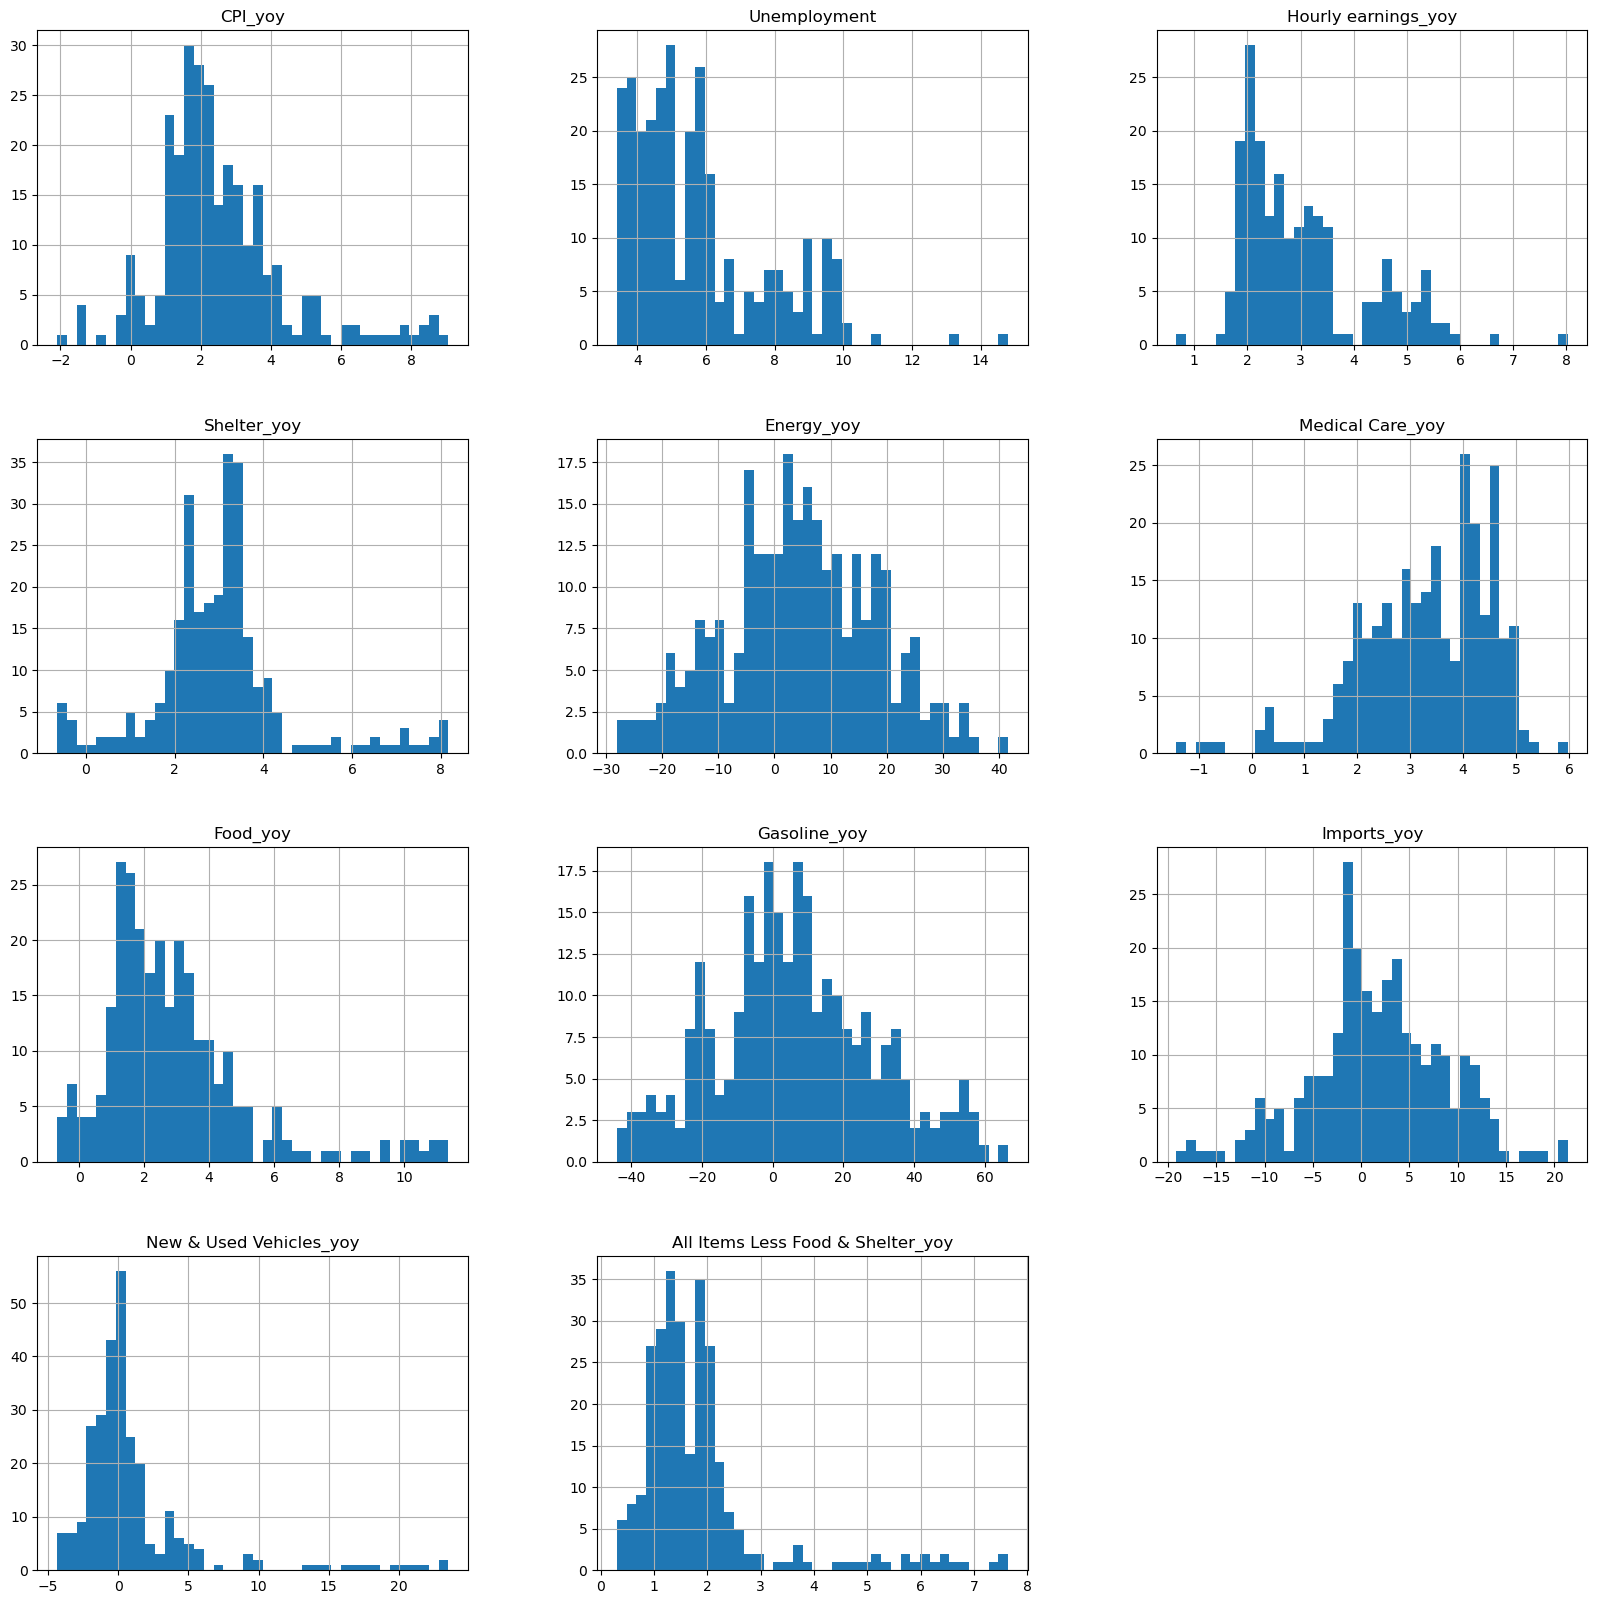

In [655]:
bls.hist(bins = 40, figsize = (20, 20));

**Observations:**
- CPI yoy has a peak around 2% as to be expected. 
- Import centre near 0 
- vehicles seem to centre around 0 
- Imports yoy, gasloine yoy, hourly earnings yoy, energy yoy appear to have double peaks. 

In [656]:
bls.describe()

,CPI_yoy,Unemployment,Hourly earnings_yoy,Shelter_yoy,Energy_yoy,Medical Care_yoy,Food_yoy,Gasoline_yoy,Imports_yoy,New & Used Vehicles_yoy,All Items Less Food & Shelter_yoy
count,276.000000,288.000000,202.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,2.528411,5.763542,3.048984,3.000028,4.517148,3.298467,2.911176,6.401228,1.722039,1.126088,1.880349
std,1.834622,1.971687,1.195881,1.546201,13.446904,1.234076,2.245164,22.757070,7.015737,4.588820,1.316439
min,-2.097161,3.400000,0.666445,-0.649093,-28.093208,-1.417903,-0.678403,-44.072848,-19.118644,-4.369919,0.303587
25%,1.513777,4.300000,2.125760,2.252884,-4.317146,2.528533,1.442390,-7.501760,-1.861140,-0.994445,1.165626
50%,2.160308,5.200000,2.689661,2.988692,4.493116,3.465685,2.432628,5.089727,1.372079,0.052547,1.548247
75%,3.258220,6.700000,3.497023,3.486291,14.287334,4.272099,3.694357,20.345503,6.500790,1.358399,2.024245
max,9.059758,14.800000,8.027358,8.175182,41.623878,5.977259,11.370842,66.602871,21.399177,23.533280,7.639952


- Big outliers in energy_yoy - seen in high max and difference between mean and median. 
- Some outliers in food_yoy - seen in high max and difference between mean and median. 
- Gasoline_yoy, imports_yoy, energy_yoy and New & Used Vehicles_yoy - show negative inflation in some years. 
- Gasoline_yoy and energy_yoy have highest standard deviations and are likely correlated/connected by oil prices. 

In [657]:
bls.corr(numeric_only=True)['CPI_yoy'].sort_values(ascending=False)

CPI_yoy                              1.000000
Energy_yoy                           0.813378
All Items Less Food & Shelter_yoy    0.784644
Gasoline_yoy                         0.750454
Food_yoy                             0.709975
Imports_yoy                          0.704914
New & Used Vehicles_yoy              0.593531
Hourly earnings_yoy                  0.496653
Shelter_yoy                          0.473088
Medical Care_yoy                     0.017462
Unemployment                        -0.428050
Name: CPI_yoy, dtype: float64

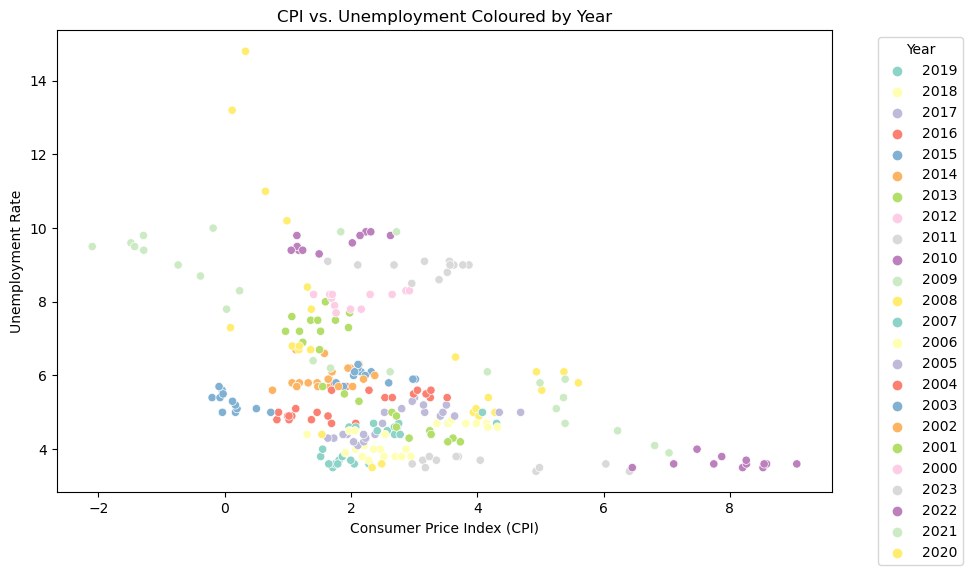

In [658]:
# Create scatter plot of CPI yoy and Unemployment 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=bls, x='CPI_yoy', y='Unemployment', hue='year', palette="Set3", legend='full')

plt.title('CPI vs. Unemployment Coloured by Year')
plt.xlabel('Consumer Price Index (CPI)')
plt.ylabel('Unemployment Rate')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

The philips curve relationship, as inflation rises unemployment falls, as unemployment rate increase inflation falls. 

In [659]:
bls.columns

Index(['year', 'CPI_yoy', 'Unemployment', 'Hourly earnings_yoy', 'Shelter_yoy',
       'Energy_yoy', 'Medical Care_yoy', 'Food_yoy', 'Gasoline_yoy',
       'Imports_yoy', 'New & Used Vehicles_yoy',
       'All Items Less Food & Shelter_yoy', 'month'],
      dtype='object')

In [660]:
bls.isna().sum()

year                                  0
CPI_yoy                              12
Unemployment                          0
Hourly earnings_yoy                  86
Shelter_yoy                          12
Energy_yoy                           12
Medical Care_yoy                     12
Food_yoy                             12
Gasoline_yoy                         12
Imports_yoy                          12
New & Used Vehicles_yoy              12
All Items Less Food & Shelter_yoy    12
month                                 0
dtype: int64

In [661]:
bls['year'].value_counts().sort_values(ascending=False)

year
2019    12
2018    12
2017    12
2016    12
2015    12
2014    12
2013    12
2012    12
2011    12
2010    12
2009    12
2008    12
2007    12
2006    12
2005    12
2004    12
2003    12
2002    12
2001    12
2000    12
2023    12
2022    12
2021    12
2020    12
Name: count, dtype: int64

In [662]:
bls['yearMonth'] = bls['year'] + '-' + bls['month']

In [663]:
bls.shape

(288, 14)

# Cleaning BEA Data 

In [664]:
bea = pd.read_csv('../data/BEA_data_2001_2023.csv')
bea.head()

,Unnamed: 0,TableName,SeriesCode,LineNumber,LineDescription,TimePeriod,METRIC_NAME,CL_UNIT,UNIT_MULT,DataValue,NoteRef
0,0,T20600,A065RC,1,Personal income,2001M01,Current Dollars,Level,6,"8,940,891",T20600
1,1,T20600,A065RC,1,Personal income,2001M02,Current Dollars,Level,6,"8,975,805",T20600
2,2,T20600,A065RC,1,Personal income,2001M03,Current Dollars,Level,6,"9,009,416",T20600
3,3,T20600,A065RC,1,Personal income,2001M04,Current Dollars,Level,6,"9,008,903",T20600
4,4,T20600,A065RC,1,Personal income,2001M05,Current Dollars,Level,6,"9,011,065",T20600


In [665]:
bea.isna().sum()

Unnamed: 0         0
TableName          0
SeriesCode         0
LineNumber         0
LineDescription    0
TimePeriod         0
METRIC_NAME        0
CL_UNIT            0
UNIT_MULT          0
DataValue          0
NoteRef            0
dtype: int64

In [666]:
bea.dtypes

Unnamed: 0          int64
TableName          object
SeriesCode         object
LineNumber          int64
LineDescription    object
TimePeriod         object
METRIC_NAME        object
CL_UNIT            object
UNIT_MULT           int64
DataValue          object
NoteRef            object
dtype: object

In [667]:
bea['LineDescription'].value_counts()

LineDescription
Personal income                                                                            276
To the rest of the world (net)                                                             276
Less: Contributions for government social insurance, domestic                              276
Less: Personal current taxes                                                               276
Equals: Disposable personal income                                                         276
Less: Personal outlays                                                                     276
Personal consumption expenditures                                                          276
Personal interest payments                                                                 276
Personal current transfer payments                                                         276
To government                                                                              276
Equals: Personal saving           

In [668]:
# metric name is 
bea['METRIC_NAME'].value_counts()

METRIC_NAME
Current Dollars    9936
Ratio               828
Chained Dollars     828
Persons             276
Name: count, dtype: int64

In [669]:
bea['CL_UNIT'].value_counts()

CL_UNIT
Level             11040
Percent change      828
Name: count, dtype: int64

In [670]:
# 6 is trillion, 3 is billion, 0 is as is 
bea['UNIT_MULT'].value_counts()

UNIT_MULT
6    9936
0    1656
3     276
Name: count, dtype: int64

In [671]:
bea['UNIT_MULT'] = bea['UNIT_MULT'].map({6: 1_000_000, 3 : 1_000, 0 : 1})
bea['UNIT_MULT'].value_counts()

UNIT_MULT
1000000    9936
1          1656
1000        276
Name: count, dtype: int64

In [672]:
bea['DataValue'] = bea['DataValue'].replace(',', '', regex=True).astype(float)
bea['DataValue']

0        8940891.0
1        8975805.0
2        9009416.0
3        9008903.0
4        9011065.0
           ...    
11863          0.0
11864         -0.1
11865          0.3
11866          0.5
11867          0.1
Name: DataValue, Length: 11868, dtype: float64

In [673]:
bea['value']= bea['DataValue'] * bea['UNIT_MULT']
bea['value'].describe()

count    1.186800e+04
mean     2.874035e+12
std      4.630306e+12
min     -1.520000e+01
25%      7.109800e+10
50%      8.006150e+11
75%      2.314122e+12
max      2.447176e+13
Name: value, dtype: float64

In [674]:
# make the month year column
bls['year'] = bls['year'].astype(str)

In [675]:
bea['year'] = bea['TimePeriod'].apply(lambda x: x[:4])
bea['year'].value_counts().sort_values(ascending=False)

year
2001    516
2002    516
2003    516
2004    516
2005    516
2006    516
2007    516
2008    516
2009    516
2010    516
2011    516
2012    516
2013    516
2014    516
2015    516
2016    516
2017    516
2018    516
2019    516
2020    516
2021    516
2022    516
2023    516
Name: count, dtype: int64

In [676]:
bea['TimePeriod'].value_counts()

TimePeriod
2001M01    43
2016M03    43
2016M09    43
2016M08    43
2016M07    43
           ..
2009M02    43
2009M03    43
2009M04    43
2009M05    43
2023M12    43
Name: count, Length: 276, dtype: int64

In [677]:
def get_month(row): 
    months = {'12' : 'December', '11' : 'November', '10' : 'October', '09' : 'September', '08' : 'August', '07' : 'July',
       '06' : 'June', '05' : 'May', '04' : 'April', '03': 'March', '02' : 'February', '01' : 'January'}
    monthNum = row[5:7]
    return months[monthNum]

bea['month'] = bea['TimePeriod'].apply(get_month)
bea['month'].value_counts()

month
January      989
February     989
March        989
April        989
May          989
June         989
July         989
August       989
September    989
October      989
November     989
December     989
Name: count, dtype: int64

In [678]:
# create year-month column to join data with 

bea['yearMonth'] = bea['year'] + '-' + bea['month']


In [679]:
bea.columns

Index(['Unnamed: 0', 'TableName', 'SeriesCode', 'LineNumber',
       'LineDescription', 'TimePeriod', 'METRIC_NAME', 'CL_UNIT', 'UNIT_MULT',
       'DataValue', 'NoteRef', 'value', 'year', 'month', 'yearMonth'],
      dtype='object')

In [680]:
bea.drop(columns=['Unnamed: 0', 'TableName', 'SeriesCode', 'LineNumber',
       'TimePeriod', 'METRIC_NAME', 'CL_UNIT', 'UNIT_MULT',
       'DataValue', 'NoteRef', 'year', 'month'], inplace=True)

In [681]:
bea.shape

(11868, 3)

In [682]:
# Assuming 'melted_df' is your long-format DataFrame
# Use the pivot function to reshape it back to wide format
wide_bea = bea.pivot(index='yearMonth', columns='LineDescription', values='value').reset_index()
wide_bea.head()

LineDescription,yearMonth,Chained (2017) dollars,Compensation of employees,Current dollars,"Disposable personal income, chained (2017) dollars","Disposable personal income, current dollars",Employer contributions for employee pension and insurance funds,Employer contributions for government social insurance,Equals: Disposable personal income,Equals: Personal saving,...,Proprietors' income with inventory valuation and capital consumption adjustments,Rental income of persons with capital consumption adjustment,Social security,Supplements to wages and salaries,To government,To the rest of the world (net),"Total, Billions of chained (2017) dollars",Unemployment insurance,Veterans' benefits,Wages and salaries
0,2001-April,35956.0,6.048838e+12,27034.0,-0.2,0.0,7.186470e+11,3.582320e+11,7.693797e+12,3.692820e+11,...,8.190360e+11,2.011120e+11,4.229760e+11,1.076880e+12,5.212400e+10,3.811300e+10,1.023306e+13,2.726400e+10,2.643600e+10,4.971959e+12
1,2001-August,36917.0,6.022934e+12,27866.0,1.7,1.6,7.312060e+11,3.572180e+11,7.958169e+12,5.174460e+11,...,8.537880e+11,2.048700e+11,4.266120e+11,1.088424e+12,5.339200e+10,3.916100e+10,1.054306e+13,3.057600e+10,2.647200e+10,4.934510e+12
2,2001-December,35943.0,6.048399e+12,27087.0,0.2,0.1,7.445590e+11,3.596110e+11,7.761452e+12,2.865960e+11,...,8.396280e+11,2.060480e+11,4.319280e+11,1.104170e+12,5.459200e+10,3.968800e+10,1.029890e+13,4.256400e+10,2.726400e+10,4.944228e+12
3,2001-February,35977.0,6.055399e+12,27000.0,0.1,0.3,7.128440e+11,3.581620e+11,7.672371e+12,3.506950e+11,...,8.082880e+11,1.969760e+11,4.205400e+11,1.071006e+12,5.152400e+10,3.733000e+10,1.022342e+13,2.535600e+10,2.607600e+10,4.984394e+12
4,2001-January,35962.0,6.022606e+12,26946.0,0.5,1.0,7.101100e+11,3.557660e+11,7.651692e+12,3.446980e+11,...,8.018280e+11,1.956380e+11,4.192080e+11,1.065876e+12,5.118800e+10,3.733000e+10,1.021174e+13,2.732400e+10,2.608800e+10,4.956730e+12


In [683]:
wide_bea['yearMonth']

0          2001-April
1         2001-August
2       2001-December
3       2001-February
4        2001-January
            ...      
271        2023-March
272          2023-May
273     2023-November
274      2023-October
275    2023-September
Name: yearMonth, Length: 276, dtype: object

In [684]:
bls['yearMonth']

0      2019-December
1      2019-November
2       2019-October
3     2019-September
4        2019-August
           ...      
43          2020-May
44        2020-April
45        2020-March
46     2020-February
47      2020-January
Name: yearMonth, Length: 288, dtype: object

# Cleaning Credit Card and Mortgage Data 

In [685]:
# this is the average cc rate 
cc_rate = pd.read_csv('../data/FRED_CC_RATE.csv')
cc_rate.head()

,DATE,TERMCBCCALLNS
0,1994-11-01,15.69
1,1994-12-01,.
2,1995-01-01,.
3,1995-02-01,16.10
4,1995-03-01,.


In [686]:
# this is the 30 year mortgage rate 
mortgage_rate = pd.read_csv('../data/FRED_MORTGAGE30US.csv')
mortgage_rate.head()

,DATE,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


In [687]:
cc_30day_overdue = pd.read_csv('../data/FRED_CC_BALS_30D_DUE.csv')
cc_30day_overdue.head()

,DATE,RCCCBBALDPD30P
0,2012-07-01,3.15
1,2012-10-01,3.09
2,2013-01-01,2.95
3,2013-04-01,2.94
4,2013-07-01,2.48


In [688]:
cc_90day_overdue = pd.read_csv('../data/FRED_CC_BALS_90D_DUE.csv')
cc_90day_overdue.head()

,DATE,RCCCBBALDPD90P
0,2012-07-01,1.61
1,2012-10-01,1.63
2,2013-01-01,1.61
3,2013-04-01,1.73
4,2013-07-01,1.14


In [689]:
cc_bals_qtrly = pd.read_csv('../data/FRED_CC_BALS_QTRLY.csv')
cc_bals_qtrly.head()

,DATE,RCCCBBALTOT
0,2012-07-01,568.16
1,2012-10-01,584.39
2,2013-01-01,553.91
3,2013-04-01,561.64
4,2013-07-01,561.49


In [690]:
def get_month_2(row): 
    months = {'12' : 'December', '11' : 'November', '10' : 'October', '09' : 'September', '08' : 'August', '07' : 'July',
       '06' : 'June', '05' : 'May', '04' : 'April', '03': 'March', '02' : 'February', '01' : 'January'}
    return months[row]

In [691]:
# make yearMonth column 
cc_rate['year'] = cc_rate['DATE'].apply(lambda x: x[:4])
cc_rate['monthNum'] = cc_rate['DATE'].apply(lambda x: x[5:7])

mortgage_rate['year'] = mortgage_rate['DATE'].apply(lambda x: x[:4])
mortgage_rate['monthNum'] = mortgage_rate['DATE'].apply(lambda x: x[5:7])

cc_30day_overdue['year'] = cc_30day_overdue['DATE'].apply(lambda x: x[:4])
cc_30day_overdue['monthNum'] = cc_30day_overdue['DATE'].apply(lambda x: x[5:7])

cc_90day_overdue['year'] = cc_90day_overdue['DATE'].apply(lambda x: x[:4])
cc_90day_overdue['monthNum'] = cc_90day_overdue['DATE'].apply(lambda x: x[5:7])

cc_bals_qtrly['year'] = cc_bals_qtrly['DATE'].apply(lambda x: x[:4])
cc_bals_qtrly['monthNum'] = cc_bals_qtrly['DATE'].apply(lambda x: x[5:7])

In [692]:
cc_rate['month'] = cc_rate['monthNum'].apply(get_month_2)
mortgage_rate['month'] = mortgage_rate['monthNum'].apply(get_month_2)
cc_30day_overdue['month'] = cc_30day_overdue['monthNum'].apply(get_month_2)
cc_90day_overdue['month'] = cc_90day_overdue['monthNum'].apply(get_month_2)
cc_bals_qtrly['month'] = cc_bals_qtrly['monthNum'].apply(get_month_2)

In [693]:
cc_rate['yearMonth'] = cc_rate['year'] + '-' + cc_rate['month']
mortgage_rate['yearMonth'] = mortgage_rate['year'] + '-' + mortgage_rate['month']
cc_30day_overdue['yearMonth'] = cc_30day_overdue['year'] + '-' + cc_30day_overdue['month']
cc_90day_overdue['yearMonth'] = cc_90day_overdue['year'] + '-' + cc_90day_overdue['month']
cc_bals_qtrly['yearMonth'] = cc_bals_qtrly['year'] + '-' + cc_bals_qtrly['month']

In [694]:
mortgage_rate.drop(columns=['DATE', 'year', 'monthNum', 'month'], inplace=True)
cc_30day_overdue.drop(columns=['DATE', 'year', 'monthNum', 'month'], inplace=True)
cc_rate.drop(columns=['DATE', 'year', 'monthNum', 'month'], inplace=True)
cc_90day_overdue.drop(columns=['DATE', 'year', 'monthNum', 'month'], inplace=True)
cc_bals_qtrly.drop(columns=['DATE', 'year', 'monthNum', 'month'], inplace=True)

In [695]:
mortgage_rate =  mortgage_rate.groupby('yearMonth')['MORTGAGE30US'].mean().reset_index()
mortgage_rate['yearMonth'].value_counts()

yearMonth
1971-April        1
2006-November     1
2006-December     1
2006-February     1
2006-January      1
                 ..
1988-September    1
1989-April        1
1989-August       1
1989-December     1
2024-January      1
Name: count, Length: 635, dtype: int64

# Joining the dataframes - EDA


In [696]:
clean_df_1 = pd.merge(bls, wide_bea, on='yearMonth', how='left')
clean_df_1.shape



(288, 57)

In [697]:
clean_df_2 = pd.merge(clean_df_1, cc_rate, on='yearMonth', how='left')
clean_df_2.shape

(288, 58)

In [698]:
clean_df_3 = pd.merge(clean_df_2, mortgage_rate, on='yearMonth', how='left')
clean_df_3.shape

(288, 59)

In [699]:
clean_df_4 = pd.merge(clean_df_3, cc_30day_overdue, on='yearMonth', how='left')
clean_df_5 = pd.merge(clean_df_4, cc_90day_overdue, on='yearMonth', how='left')
clean_df = pd.merge(clean_df_5, cc_bals_qtrly, on='yearMonth', how='left')

In [700]:
clean_df

,year,CPI_yoy,Unemployment,Hourly earnings_yoy,Shelter_yoy,Energy_yoy,Medical Care_yoy,Food_yoy,Gasoline_yoy,Imports_yoy,...,To the rest of the world (net),"Total, Billions of chained (2017) dollars",Unemployment insurance,Veterans' benefits,Wages and salaries,TERMCBCCALLNS,MORTGAGE30US,RCCCBBALDPD30P,RCCCBBALDPD90P,RCCCBBALTOT
0,2019,2.285130,3.6,2.976407,3.226840,3.437022,4.619287,1.807531,7.166529,0.482315,...,9.730900e+10,1.568484e+13,2.795200e+10,1.381160e+11,9.499575e+12,.,3.7200,NaN,NaN,NaN
1,2019,2.051278,3.6,3.316327,3.315695,-0.590061,4.272018,2.000165,-1.909397,-1.188590,...,9.730900e+10,1.577824e+13,2.672600e+10,1.366920e+11,9.491966e+12,14.87,3.6950,NaN,NaN,NaN
2,2019,1.764043,3.6,3.142126,3.355015,-4.166427,4.292580,2.073456,-7.412539,-2.961808,...,9.730900e+10,1.571815e+13,2.553100e+10,1.352670e+11,9.435528e+12,.,3.6880,2.93,1.46,760.36
3,2019,1.711305,3.5,3.111274,3.506051,-4.751840,3.418900,1.788571,-8.458058,-2.114330,...,9.181100e+10,1.569132e+13,2.420700e+10,1.338030e+11,9.362909e+12,.,3.6050,NaN,NaN,NaN
4,2019,1.749780,3.6,3.419118,3.352060,-4.389285,3.384868,1.705389,-7.232704,-2.115987,...,9.181100e+10,1.565409e+13,2.496300e+10,1.324870e+11,9.339749e+12,15.1,3.6160,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,2020,0.117926,13.2,6.676238,2.562970,-18.911473,4.912065,4.001782,-35.229231,-6.299213,...,9.550500e+10,1.710463e+13,1.116350e+12,1.448080e+11,9.016173e+12,14.52,3.2325,NaN,NaN,NaN
284,2020,0.329097,14.8,8.027358,2.614179,-17.716035,4.815076,3.511338,-33.827160,-6.782334,...,9.550500e+10,1.802016e+13,3.697220e+11,1.434660e+11,8.727535e+12,.,3.3060,2.40,1.32,654.76
285,2020,1.539327,4.4,3.489209,3.012954,-5.739075,4.741351,1.933852,-11.583463,-4.186414,...,9.320100e+10,1.569625e+13,6.712100e+10,1.423950e+11,9.489907e+12,.,3.4500,NaN,NaN,NaN
286,2020,2.334874,3.5,3.031397,3.323537,2.769064,4.656250,1.809332,4.759881,-1.270850,...,9.320100e+10,1.591795e+13,2.768200e+10,1.411110e+11,9.744562e+12,15.09,3.4650,NaN,NaN,NaN


In [701]:
clean_df.columns

Index(['year', 'CPI_yoy', 'Unemployment', 'Hourly earnings_yoy', 'Shelter_yoy',
       'Energy_yoy', 'Medical Care_yoy', 'Food_yoy', 'Gasoline_yoy',
       'Imports_yoy', 'New & Used Vehicles_yoy',
       'All Items Less Food & Shelter_yoy', 'month', 'yearMonth',
       'Chained (2017) dollars', 'Compensation of employees',
       'Current dollars', 'Disposable personal income, chained (2017) dollars',
       'Disposable personal income, current dollars',
       'Employer contributions for employee pension and insurance funds',
       'Employer contributions for government social insurance',
       'Equals: Disposable personal income', 'Equals: Personal saving', 'Farm',
       'Government', 'Government social benefits to persons',
       'Less: Contributions for government social insurance, domestic',
       'Less: Personal current taxes', 'Less: Personal outlays', 'Medicaid',
       'Medicare', 'Nonfarm', 'Other',
       'Other current transfer receipts, from business (net)',
       '

In [702]:
clean_df.columns = [col.lower().replace(' ', '_') for col in clean_df.columns]
clean_df.columns

Index(['year', 'cpi_yoy', 'unemployment', 'hourly_earnings_yoy', 'shelter_yoy',
       'energy_yoy', 'medical_care_yoy', 'food_yoy', 'gasoline_yoy',
       'imports_yoy', 'new_&_used_vehicles_yoy',
       'all_items_less_food_&_shelter_yoy', 'month', 'yearmonth',
       'chained_(2017)_dollars', 'compensation_of_employees',
       'current_dollars', 'disposable_personal_income,_chained_(2017)_dollars',
       'disposable_personal_income,_current_dollars',
       'employer_contributions_for_employee_pension_and_insurance_funds',
       'employer_contributions_for_government_social_insurance',
       'equals:_disposable_personal_income', 'equals:_personal_saving', 'farm',
       'government', 'government_social_benefits_to_persons',
       'less:_contributions_for_government_social_insurance,_domestic',
       'less:_personal_current_taxes', 'less:_personal_outlays', 'medicaid',
       'medicare', 'nonfarm', 'other',
       'other_current_transfer_receipts,_from_business_(net)',
       '

In [703]:
clean_df.drop(columns=['disposable_personal_income,_chained_(2017)_dollars', 
                       'disposable_personal_income,_current_dollars',
                        'farm', 'nonfarm', 'other', 'other_current_transfer_receipts,_from_business_(net)', 
                        'personal_current_transfer_payments', 
                        'personal_current_transfer_receipts', 
                        'personal_income_excluding_current_transfer_receipts,_billions_of_chained_(2017)_dollars',
                        'personal_income_receipts_on_assets',
                        'personal_outlays,_current_dollars',
                        "proprietors'_income_with_inventory_valuation_and_capital_consumption_adjustments",
                        'supplements_to_wages_and_salaries',
                        'to_the_rest_of_the_world_(net)',
                        'yearmonth'
                        ], inplace=True)

In [704]:

clean_df.rename(columns={'unemployment': 'unemployment_rate',
                   'all_items_less_food_&_shelter_yoy': 'all_less_food_&_shelter_yoy',
                   'compensation_of_employees' : 'total_employee_compensation', 
                   'current_dollars' : 'disp_inc_per_capita_current_dollars',
                   'chained_(2017)_dollars' : 'disp_inc_per_capita_chained_2017',
                   'equals:_disposable_personal_income' : 'total_disposable_personal_income',
                   'equals:_personal_saving' : 'total_personal_savings',
                   'government' : 'wages_salaries_government_employees', 
                   'private_industries' : 'wages_salaries_private_employees', 
                   'government_social_benefits_to_persons' : 'total_gov_social_benefits',
                   'less:_contributions_for_government_social_insurance,_domestic' : 'tax_gov_social_insurance_domestic',
                   'less:_personal_current_taxes' : 'tax_personal_current',
                   'less:_personal_outlays' : 'total_all_personal_outlays',
                   'personal_income' : 'total_personal_income',
                   "population_(midperiod,_thousands)": 'population',
                   'rental_income_of_persons_with_capital_consumption_adjustment' : 'rental_income_(capital_consumption_adjusted)',
                   'total,_billions_of_chained_(2017)_dollars' : 'total_disposible_personal_income_chained_2017',
                   'wages_and_salaries' : 'wages_and_salaries_all',
                   'termcbccallns' : 'cc_rate_all_ns',
                   'mortgage30us' : 'mortgage_rate_30_yr', 
                   'rcccbbaldpd30p' : 'cc_bals_30d_due_percentage',
                   'rcccbbaldpd90p' : 'cc_bals_90d_due_percentage',
                   'rcccbbaltot' : 'cc_balance_total_billions',
                   'to_government' : 'tax_other_to_government'
                   
                   }, inplace=True)

In [705]:
clean_df.columns

Index(['year', 'cpi_yoy', 'unemployment_rate', 'hourly_earnings_yoy',
       'shelter_yoy', 'energy_yoy', 'medical_care_yoy', 'food_yoy',
       'gasoline_yoy', 'imports_yoy', 'new_&_used_vehicles_yoy',
       'all_less_food_&_shelter_yoy', 'month',
       'disp_inc_per_capita_chained_2017', 'total_employee_compensation',
       'disp_inc_per_capita_current_dollars',
       'employer_contributions_for_employee_pension_and_insurance_funds',
       'employer_contributions_for_government_social_insurance',
       'total_disposable_personal_income', 'total_personal_savings',
       'wages_salaries_government_employees', 'total_gov_social_benefits',
       'tax_gov_social_insurance_domestic', 'tax_personal_current',
       'total_all_personal_outlays', 'medicaid', 'medicare',
       'personal_consumption_expenditures', 'personal_dividend_income',
       'total_personal_income', 'personal_interest_income',
       'personal_interest_payments',
       'personal_saving_as_a_percentage_of_dispos

In [708]:
clean_df['tax_total_all_taxes'] = clean_df['tax_gov_social_insurance_domestic'] + clean_df['tax_personal_current'] + clean_df['tax_other_to_government']

In [712]:
desired_columns_order = [# general
                          'year', 'month', 'population', 'unemployment_rate', 'hourly_earnings_yoy',  
                          
                         # inflation
                         'cpi_yoy', 'shelter_yoy', 'energy_yoy', 'medical_care_yoy', 
                         'food_yoy', 'gasoline_yoy', 'imports_yoy', 'new_&_used_vehicles_yoy', 'all_less_food_&_shelter_yoy',

                         # personal income and types of income/receipts 
                         'total_personal_income', 'total_employee_compensation', 'wages_and_salaries_all', 'wages_salaries_private_employees', 'wages_salaries_government_employees',
                         'employer_contributions_for_employee_pension_and_insurance_funds','employer_contributions_for_government_social_insurance',
                         'rental_income_(capital_consumption_adjusted)', 'personal_dividend_income', 'personal_interest_income',
                         'total_gov_social_benefits', 'social_security', 'medicare', 'medicaid', 'unemployment_insurance', "veterans'_benefits",

                         # disp income and savings
                         'total_disposible_personal_income_chained_2017', 'total_personal_savings','personal_saving_as_a_percentage_of_disposable_personal_income',
                         'disp_inc_per_capita_chained_2017', 'total_disposable_personal_income', 'disp_inc_per_capita_current_dollars', 

                         # outgoings and taxes
                         'total_all_personal_outlays','personal_interest_payments', 'tax_other_to_government', 'tax_personal_current',
                         'tax_gov_social_insurance_domestic', 'tax_total_all_taxes',

                         # credit cards and debt 
                         'cc_rate_all_ns', 'mortgage_rate_30_yr','cc_bals_30d_due_percentage', 'cc_bals_90d_due_percentage', 'cc_balance_total_billions'  
                        ]
# Reorder columns in the DataFrame
clean_df = clean_df[desired_columns_order]

In [713]:
clean_df.head()

,year,month,population,unemployment_rate,hourly_earnings_yoy,cpi_yoy,shelter_yoy,energy_yoy,medical_care_yoy,food_yoy,...,personal_interest_payments,tax_other_to_government,tax_personal_current,tax_gov_social_insurance_domestic,tax_total_all_taxes,cc_rate_all_ns,mortgage_rate_30_yr,cc_bals_30d_due_percentage,cc_bals_90d_due_percentage,cc_balance_total_billions
0,2019,December,331345000.0,3.6,2.976407,2.285130,3.226840,3.437022,4.619287,1.807531,...,3.510450e+11,1.141310e+11,2.228563e+12,1.445443e+12,3.788137e+12,.,3.720,NaN,NaN,NaN
1,2019,November,331213000.0,3.6,3.316327,2.051278,3.315695,-0.590061,4.272018,2.000165,...,3.493480e+11,1.144740e+11,2.222931e+12,1.445227e+12,3.782632e+12,14.87,3.695,NaN,NaN,NaN
2,2019,October,331066000.0,3.6,3.142126,1.764043,3.355015,-4.166427,4.292580,2.073456,...,3.488320e+11,1.147100e+11,2.209687e+12,1.438320e+12,3.762717e+12,.,3.688,2.93,1.46,760.36
3,2019,September,330904000.0,3.5,3.111274,1.711305,3.506051,-4.751840,3.418900,1.788571,...,3.494810e+11,1.148640e+11,2.194830e+12,1.429200e+12,3.738894e+12,.,3.605,NaN,NaN,NaN
4,2019,August,330729000.0,3.6,3.419118,1.749780,3.352060,-4.389285,3.384868,1.705389,...,3.506330e+11,1.149560e+11,2.197049e+12,1.426682e+12,3.738687e+12,15.1,3.616,NaN,NaN,NaN


In [714]:
clean_df.to_csv('../data/all_monthly_data_clean.csv', index=False)